In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [5]:
data1 = pd.read_csv('./Datasets/SAT to GPA.csv')
data1

,SAT Score,GPA
0,1600,4.0
1,1593,4.0
2,1587,4.0
3,1580,4.0
4,1573,4.0
...,...,...
176,427,0.0
177,420,0.0
178,413,0.0
179,407,0.0


In [31]:
##Scaling
scalerx = StandardScaler()
scalery = StandardScaler()
scalerx.fit(data['SAT Score'].values.reshape(-1,1))
scalery.fit(data['GPA'].values.reshape(-1,1))
newX = scalerx.transform(data['SAT Score'].values.reshape(-1,1))
newY = scalery.transform(data['GPA'].values.reshape(-1,1))
print(newX, newY)

[[ 1.72251769]
 [ 1.70242165]
 [ 1.68519647]
 [ 1.66510043]
 [ 1.64500439]
 [ 1.62777922]
 [ 1.60768318]
 [ 1.58758714]
 [ 1.57036196]
 [ 1.55026592]
 [ 1.53016988]
 [ 1.5129447 ]
 [ 1.49284866]
 [ 1.47275263]
 [ 1.45552745]
 [ 1.43543141]
 [ 1.41533537]
 [ 1.39811019]
 [ 1.37801415]
 [ 1.35791811]
 [ 1.34069294]
 [ 1.3205969 ]
 [ 1.30050086]
 [ 1.28327568]
 [ 1.26317964]
 [ 1.2430836 ]
 [ 1.22585842]
 [ 1.20576238]
 [ 1.18566634]
 [ 1.16844117]
 [ 1.14834513]
 [ 1.12824909]
 [ 1.11102391]
 [ 1.09092787]
 [ 1.07083183]
 [ 1.05360665]
 [ 1.03351061]
 [ 1.01341457]
 [ 0.9961894 ]
 [ 0.97609336]
 [ 0.95599732]
 [ 0.93877214]
 [ 0.9186761 ]
 [ 0.89858006]
 [ 0.88135488]
 [ 0.86125885]
 [ 0.84116281]
 [ 0.82393763]
 [ 0.80384159]
 [ 0.78374555]
 [ 0.76652037]
 [ 0.74642433]
 [ 0.72632829]
 [ 0.70910312]
 [ 0.68900708]
 [ 0.66891104]
 [ 0.65168586]
 [ 0.63158982]
 [ 0.61149378]
 [ 0.5942686 ]
 [ 0.57417256]
 [ 0.55407652]
 [ 0.53685135]
 [ 0.51675531]
 [ 0.49665927]
 [ 0.47943409]
 [ 0.45933

In [45]:
lin = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(newX, newY, test_size=0.3, random_state=3)
lin.fit(xtrain, ytrain)
print(f"Slope = ",lin.coef_[0][0],"Intercept: ", lin.intercept_[0])
preds = lin.predict(xtest)

Slope =  0.9483001078890355 Intercept:  0.007124126057612354


In [48]:
print("The Equation is: \nY =",lin.coef_[0][0],'* X +',lin.intercept_[0])

The Equation is: 
Y = 0.9483001078890355 * X + 0.007124126057612354


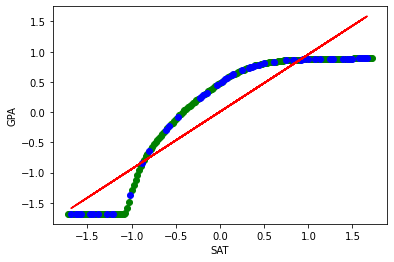

In [42]:
plt.xlabel('Scaled SAT')
plt.ylabel('Scaled GPA')
plt.scatter(xtrain, ytrain, c='green')
plt.scatter(xtest, ytest, c='blue')
plt.plot
plt.plot(xtest, preds, c='red')
plt.show()

In [39]:
## Optional , If they ask to predict a new random value

x = [[1324]]
pred_single = lin.predict(scalerx.transform(x))
print("Scaled output for 1324", pred_single[0][0])
print("Unscaled output for 1324", scalery.inverse_transform(pred_single)[0][0])

Scaled output for 1324 0.8891945302988471
Unscaled output for 1324 4.000535298012884


In [25]:
mse= mean_squared_error(ytest, preds)
mae = mean_absolute_error(ytest, preds)
rmse = pow(mse, 0.5)
print("Mean Squared Error: ", mse)
print("Mean absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  0.1573217902373645
Mean absolute Error:  0.3518325728255974
Root Mean Squared Error:  0.39663810991553056
